In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
def gen(alpha = 9000, rm = 1.7, im= 0.0, N_ta = 2**13-1):
    data = generateData(alpha,rm,im, N_ta = N_ta)
    theta = data['散射角'].to_numpy()
    i1, i2, DOP = data['I1'].to_numpy(), data['I2'].to_numpy(), data['可视度'].to_numpy()
    return i1[...,None], i2[...,None], DOP[...,None]

def generateData(alpha,rm,im =0.0,N_ta = 2**13-1):
    origin_path = os.getcwd()
    os.chdir(r"C:\Users\beidongjiedeguang\Desktop\测试文件夹")
    exeName = "Mie_Calculation.exe"
    txtName = '输入参数文本.txt'

    Ta_min, Ta_max = 0,180
    with open(txtName,'w') as f1:
        f1.write('{}\n{:.3f}\t{:.3f}\n{}\t{:.2f}\t{:.2f}'
                .format(alpha,rm,im,N_ta,Ta_min,Ta_max))

    os.system(exeName)
    dataName = "散射光强角分布.txt"
    # 没想到c写出来的不是utf-8编码的，所以这里encoding='gbk'，后面这个delimiter随便要不要
    data = pd.read_csv(dataName,sep ='\t',engine='python',encoding='gbk',delimiter='\s+')
    os.remove(dataName)
    os.chdir(origin_path)
    return data


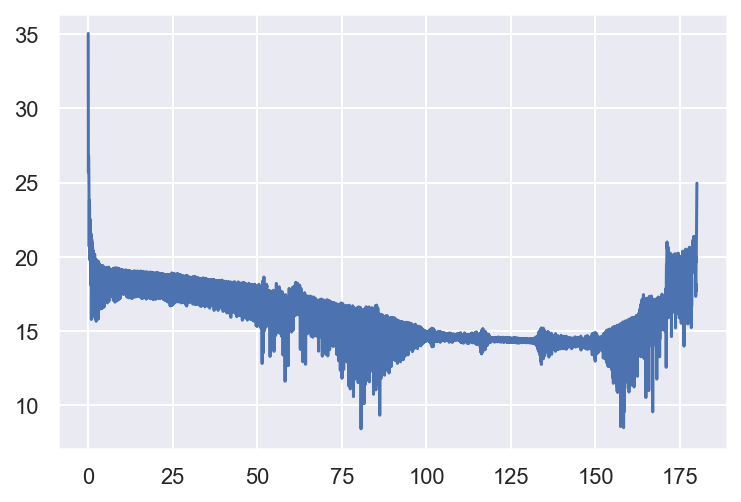

In [8]:
plt.plot(theta, np.log(i1))